# iFood CRM Predictive analysis


### Description

The objective of the team is to build a predictive model that will produce the highest profit for the
next direct marketing campaign, scheduled for the next month. 
The new campaign, sixth, aims at
selling a new gadget to the Customer Database. 
To build the model, a pilot campaign involving **2.240 customers** was carried out. 
The customers were selected at random and contacted by phone regarding the acquisition of the gadget. 
During the following months, customers who bought the offer were properly labeled. 
The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. 
Globally the campaign had a profit of -3.046MU. 
The success rate of the campaign was 15%. 

The objective is of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base.
Hopefully the model will allow the company to cherry pick the customers that are most likely to
purchase the offer while leaving out the non-respondents, making the next campaign highly
profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in
understanding to study the characteristic features of those customers who are willing to buy the
gadget.


### Key Objectives are:

3. Create a predictive model which allows the company to maximize the profit of the next marketing campaign.


In [1]:
try: 
    # libraries for data analysis
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.style.use("ggplot")

    # model to use for the classification
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB

    # tools for show results and preprocess data
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import classification_report
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from imblearn.over_sampling import RandomOverSampler
    
        
    # turn off warnings for final notebook
    import warnings
    warnings.filterwarnings('ignore')
    
except:
    !pip install -r requirements.txt

In [25]:
data = pd.read_csv("traindata.csv")
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Master,PhD,Divorced,Married,Single,Together,Widow,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0.207528,0,0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,...,0,0,0,0,1,0,0,1.306931,1.368546,0
1,-0.154701,1,1,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,...,0,0,0,0,1,0,0,-0.352035,-0.324036,0
2,0.621385,0,0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,...,0,0,0,0,0,1,0,0.432343,0.479525,0
3,-0.759686,1,0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,...,0,0,0,0,0,1,0,-0.322332,-0.290801,0
4,0.212288,1,0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,...,0,1,0,1,0,0,0,0.072607,0.123442,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.302277,0,1,-0.06,1.114464,1.09375,0.532407,0.638298,3.43750,4.744681,...,0,0,0,1,0,0,0,0.828383,0.663501,0
2236,0.387997,2,1,0.14,0.483871,-0.25000,-0.171296,-0.255319,-0.25000,-0.340426,...,0,1,0,0,0,1,0,0.104510,0.166172,1
2237,0.171993,0,0,0.84,1.528616,1.25000,0.694444,0.425532,0.12500,0.000000,...,0,0,1,0,0,0,0,0.963696,1.074184,1
2238,0.548657,0,1,-0.82,0.529657,0.68750,0.680556,1.446809,0.68750,0.787234,...,1,0,0,0,0,1,0,0.485149,0.513947,0


## Preparate Train Data

In [26]:
# Split dataset into features and labels
features = data.drop('Response', axis=1)
labels = data.Response

In [27]:
def data_preprocessing(features, labels, test_size=0.15):
    # Apply the normal train_test_split to the data
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size)
    # making oversampling in train data
    ros = RandomOverSampler(random_state=42)
    X_train, y_train = ros.fit_resample(X_train , y_train)
    return (X_train, X_test, y_train, y_test)

In [28]:
X_train, X_test, y_train, y_test = data_preprocessing(features, labels)

In [29]:
# verify that the class be balaced
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([1611, 1611])), (array([0, 1]), array([295,  41])))

In [30]:
# dict to save the results models
results_model = {}

### Naive Bayes model

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
scoretrain = nb.score(X_train, y_train)
scoretest =nb.score(X_test,y_test)
print('Accuracy on training set: {:.2f}'.format(scoretrain))
print('Accuracy on test set: {:.2f}' .format(scoretest))
results_model["Naive Bayes"] =  [scoretrain, scoretest]

Accuracy on training set: 0.74
Accuracy on test set: 0.78


### Desicion Tree model

In [32]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)
scoretrain = dt.score(X_train, y_train)
scoretest = dt.score(X_test,y_test)
print('Accuracy on training set: {:.2f}'.format(scoretrain))
print('Accuracy on test set: {:.2f}' .format(scoretest))
results_model["DecisionTreeClassifier"] =  [scoretrain, scoretest]

Accuracy on training set: 0.82
Accuracy on test set: 0.79


### Random Forest Model

In [42]:
# Using Grid Search to find the best parameters
rf = RandomForestClassifier(n_estimators= 500, max_features = 0.3, max_depth = 7, random_state = 1234)
rf.fit(X_train, y_train)
scoretrain = rf.score(X_train, y_train)
scoretest = rf.score(X_test,y_test)
print('Accuracy on training set: {:.2f}'.format(scoretrain))
print('Accuracy on test set: {:.2f}' .format(scoretest))
results_model["RandomForestClassifier"] =  [scoretrain, scoretest]

Accuracy on training set: 0.96
Accuracy on test set: 0.85


### Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
scoretrain = lr.score(X_train, y_train)
scoretest = lr.score(X_test,y_test)
print('Accuracy on training set: {:.2f}'.format(scoretrain))
print('Accuracy on test set: {:.2f}'.format(scoretest))
results_model["LogisticRegression"] =  [scoretrain, scoretest]

Accuracy on training set: 0.82
Accuracy on test set: 0.82


### KNN Model

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
scoretrain = knn.score(X_train, y_train)
scoretest = knn.score(X_test,y_test)
print('Accuracy on training set: {:.2f}'.format(scoretrain))
print('Accuracy on test set: {:.2f}' .format(scoretest))
results_model["KNeighborsClassifier"] =  [scoretrain, scoretest]

Accuracy on training set: 0.92
Accuracy on test set: 0.71


## Resultados

In [45]:
pd.DataFrame(results_model, index=["train", "test"]).transpose()

,train,test
Naive Bayes,0.743017,0.779762
DecisionTreeClassifier,0.823091,0.785714
RandomForestClassifier,0.959032,0.854167
LogisticRegression,0.818746,0.818452
KNeighborsClassifier,0.919305,0.714286


The best model is Random Forest i this case with the metric accuracy

### Model select is Random Forest 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       295
           1       0.43      0.59      0.49        41

    accuracy                           0.85       336
   macro avg       0.68      0.74      0.70       336
weighted avg       0.88      0.85      0.86       336



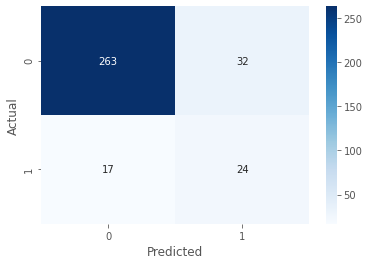

In [46]:
preds = rf.predict(X_test)
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues',fmt= ".0f")
print(classification_report(y_test, preds))

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.880


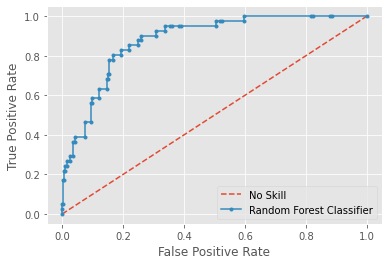

In [47]:
lr_probs = rf.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
plt.show()

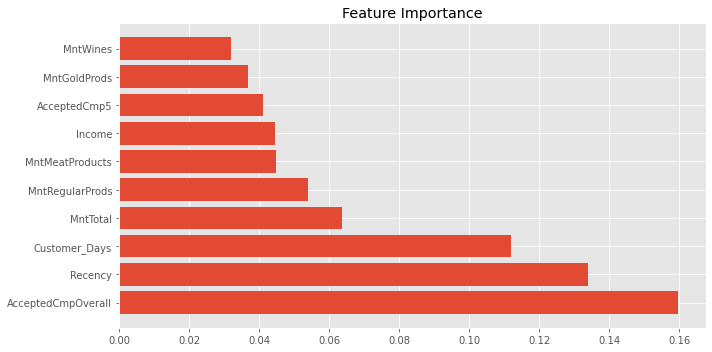

In [48]:
# get the features importances of the ramdon forest classifier
fig, ax = plt.subplots(figsize=(10,5))
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1][:10]
plt.title('Feature Importance')
plt.barh(range(10), importances[sorted_indices], align='center')
plt.yticks(range(10), features.columns[sorted_indices], rotation=0)
plt.tight_layout()
plt.show()